In [26]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

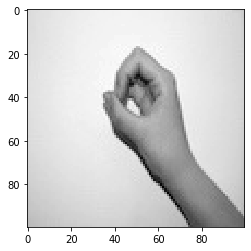

In [27]:
datadir = "E:/G.I.S.A.-Gesture-Interpreter-for-Specially-Abled-/ArjunParmar/NumberFinal"
categories=["0","1","2","3","4","5","6","7","8","9"]
for category in categories:
    path=os.path.join(datadir,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
    break
    

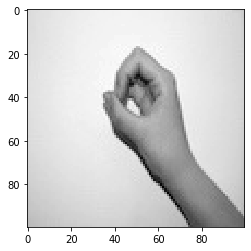

In [28]:
IMG_SIZE = 100

new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap='gray')
plt.show()

In [31]:
IMG_SIZE=100
training_data=[]
def create_training_data():
    for category in categories:
        path=os.path.join(datadir,category)
        class_num=categories.index(category)
        for img in tqdm(os.listdir(path)):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
            
create_training_data()

100%|████████████████████████████████████████████████████████████████████████████| 1224/1224 [00:00<00:00, 1485.21it/s]


In [32]:
print(len(training_data))

12354


In [33]:
import random

random.shuffle(training_data)

In [34]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[136]
   [137]
   [138]
   ...
   [120]
   [119]
   [118]]

  [[137]
   [138]
   [139]
   ...
   [121]
   [120]
   [119]]

  [[138]
   [139]
   [140]
   ...
   [122]
   [121]
   [120]]

  ...

  [[138]
   [138]
   [140]
   ...
   [121]
   [120]
   [119]]

  [[136]
   [136]
   [138]
   ...
   [121]
   [120]
   [119]]

  [[134]
   [135]
   [136]
   ...
   [118]
   [117]
   [116]]]]


In [38]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [39]:

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

(100, 100, 1)


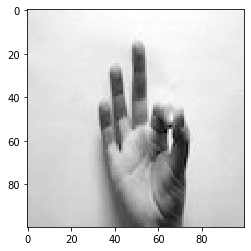

image is of : 9


In [40]:
#check for database
new_array=X[5]
print(new_array.shape)
a=X[5].reshape(IMG_SIZE, IMG_SIZE)
plt.imshow(a,cmap="gray")
plt.show()
print("image is of : "+str(y[5]))